# Nonstationary units

This notebook presents a 3D synthetic model of ArchPy and demonstrate how to simulate non-stationary surfaces

No facies or property modeling here in order to keep the notebook short

In [23]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
pv.set_jupyter_backend('static')
import sys

#For loading ArchPy, the path where ArchPy is must be added with sys
sys.path.append("../../")
#my modules
from ArchPy.base import * #ArchPy main functions 
from ArchPy.tpgs import * #Truncated plurigaussians

First defining necessary stratigraphic piles (same as in the 3D_archpy_example)

In [24]:
PB = Pile(name = "PB",seed=1)
P1 = Pile(name="P1",seed=1)

Dimensions of the grid

In [25]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x1 = 20
y1 = 10
z1 = -6
x0 = 0
y0 = 0
z0 = -15
nx = 133
ny = 67
nz = 62


dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

Non-stationarity (spatial variation of the mean value of the surfaces) is obtained by giving this mean explicitely in the dif_surf parameters of the surfaces. The key to use is "mean" and the value corresponds to a 2D array of the size of the modeling size which gives the mean surface value in each cell

let us define these mean surfaces

In [26]:
mean_A = np.ones((ny, nx)) * np.linspace(-9, -15, nx)
mean_B = mean_A + np.linspace(1.5, 2.5, nx)

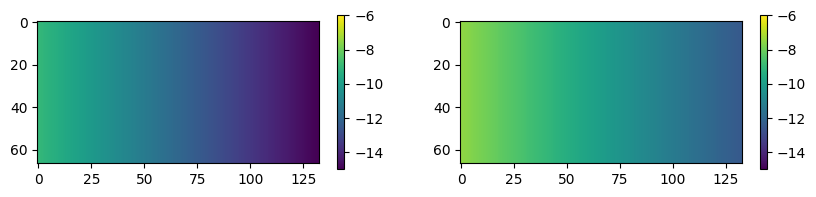

In [41]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.imshow(mean_A, vmin=-15, vmax=-6)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(mean_B, vmin=-15, vmax=-6)
plt.colorbar()

<div class="alert alert-block alert-warning">
<b>Warning:</b> If you are using a mean as a trend for the unit, you must be very careful when defining the variogram (covmodel), especially if you are fitting a model to the data. It is important to remove the trend from the data before computing the variogram. This is because, when used with a trend, the variogram will correspond to the errors of the data compared to the trend rather than the values themselves. So after processing the data, extract the hard data points (you can use Table.get_unit_data_point(unit) for this, remove the correct trend to each of the point and compute the variogram on these modified values)
</div>

## Pile

In [29]:
#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[60,60]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[80,80]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.4, 'r':[60,60]})])


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"homogenous"}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC}
dic_f_C = {"f_method":"homogenous"}
C = Unit(name="C",order=2,ID = 2,color="blue",contact="onlap",dic_facies=dic_f_C,surface=Surface(dic_surf=dic_s_C,contact="onlap"))    

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":mean_B}
dic_f_B = {"f_method":"SubPile","SubPile":PB}
B = Unit(name="B",order=3,ID = 3,color="green",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":mean_A}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

# PB
ds_B3 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B3 = {"f_method":"homogenous"}
B3 = Unit(name = "B3",order=1,ID = 6,color="forestgreen",surface=Surface(dic_surf=ds_B3,contact="onlap"),dic_facies=df_B3)

ds_B2 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B2 = {"f_method":"homogenous"}
B2 = Unit(name = "B2",order=2,ID = 7,color="limegreen",surface=Surface(dic_surf=ds_B2,contact="erode"),dic_facies=df_B2)

ds_B1 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B1 = {"f_method":"homogenous"}
B1 = Unit(name = "B1",order=3, ID = 8,color="palegreen",surface=Surface(dic_surf=ds_B1,contact="onlap"),dic_facies=df_B1)

## Subpile
PB.add_unit([B3,B2,B1])

Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅
Unit B3: Surface added for interpolation
Unit B2: Surface added for interpolation
Unit B1: Surface added for interpolation
Stratigraphic unit B3 added ✅
Stratigraphic unit B2 added ✅
Stratigraphic unit B1 added ✅


In [30]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [31]:
#logs strati
log_strati1 = [(C,-6.01),(B3,-8),(B2,-9),(B1,-9.5),(A,-10)]
log_strati2 = [(C,-6.01),(B3,-8.5),(B2,-9.5),(A,-10.5)]
log_strati3 = [(D,-6.01),(B3,-8),(B2,-8.5),(B1,-9.5),(A,-10.5)]
log_strati4 = [(D,-6.01),(B3,-9),(B2,-10),(A,-11)]
log_strati5 = [(D,-6.01),(C,-10),(A,-12)]
log_strati6 = [(D,-6.01)]

#create boreholes
bh1 = borehole("b1",1,x=10*1,y=10*5,z=log_strati1[0][1],depth =9,log_strati=log_strati1)
bh2 = borehole("b2",2,x=10*3,y=10*2,z=log_strati2[0][1],depth =8,log_strati=log_strati2)
bh3 = borehole("b3",3,x=10*5,y=10*6,z=log_strati3[0][1],depth =7,log_strati=log_strati3)
bh4 = borehole("b4",4,x=10*10,y=10*1,z=log_strati4[0][1],depth =8,log_strati=log_strati4)
bh5 = borehole("b5",5,x=10*15,y=10*3,z=log_strati5[0][1],depth =8,log_strati=log_strati5)
bh6 = borehole("b6",6,x=10*19,y=10*9,z=log_strati6[0][1],depth =3,log_strati=log_strati6)

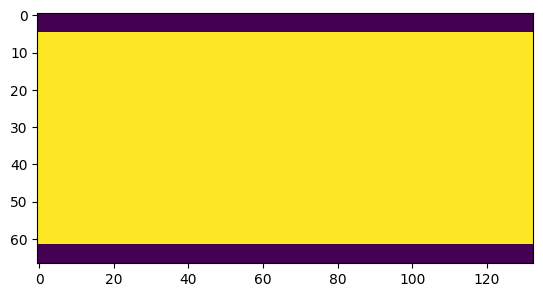

In [32]:
domain = np.ones([ny,nx],dtype=bool)
domain[: 5]= 0
domain[-5:] = 0
plt.imshow(domain)

## Table

In [33]:
T1 = Arch_table(name = "P1",seed=1)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot,polygon=domain)
T1.rem_all_bhs()
T1.add_bh([bh1,bh2,bh3,bh4,bh5,bh6])

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Standard boreholes removed
Fake boreholes removed
Geological map boreholes removed
Borehole 1 goes below model limits, borehole 1 depth cut
Borehole 1 added
Borehole 2 added
Borehole 3 added
Borehole 4 added
Borehole 5 added
Borehole 6 added


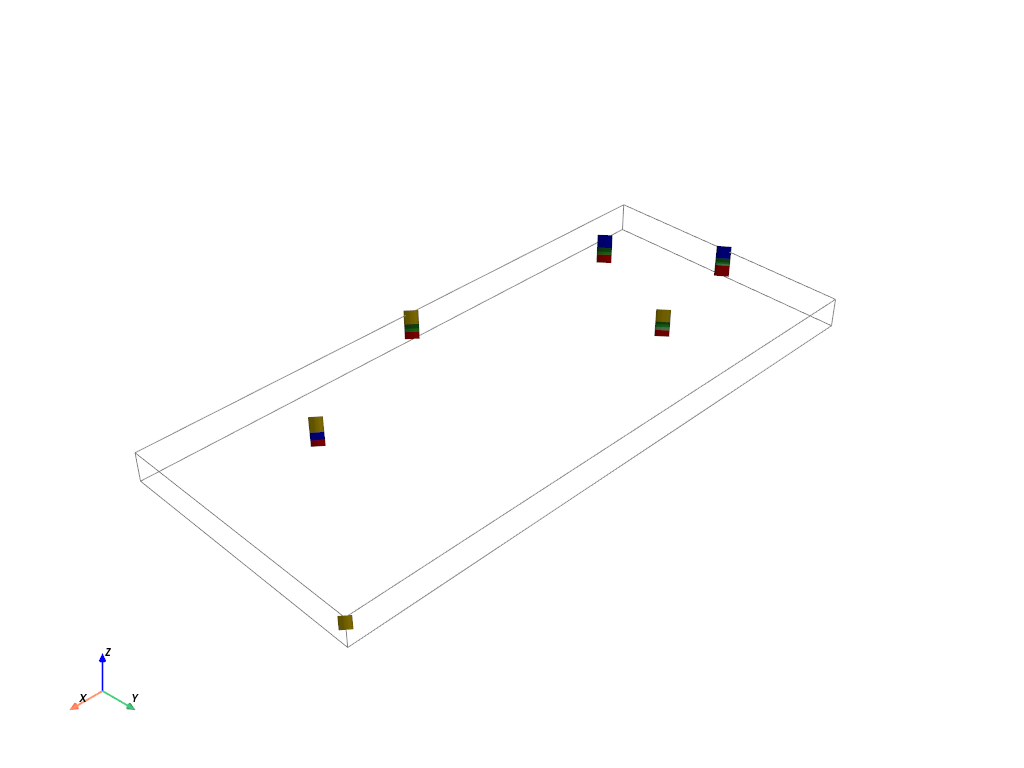

In [34]:
T1.plot_bhs()

In [35]:
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PB: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set

 ## Computing distributions for Normal Score Transform ##

Processing ended successfully


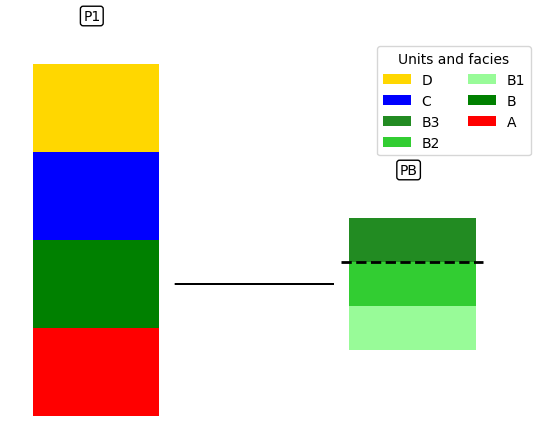

In [13]:
# plot piles
T1.plot_pile()

In [14]:
# display tables
T1.get_sp(unit_kws=["covmodel"])[0]

,name,contact,int_method,covmodel,filling_method,list_facies
0,D,onlap,grf_ineq,"0: cub (w: 0.2, r: [60, 60])",homogenous,[]
1,C,onlap,grf_ineq,"0: cub (w: 0.2, r: [80, 80])",homogenous,[]
2,B,onlap,grf_ineq,"0: cub (w: 0.4, r: [60, 60])",SubPile,[]
3,A,onlap,grf_ineq,"0: cub (w: 0.4, r: [60, 60])",homogenous,[]
4,B3,onlap,grf_ineq,"0: cub (w: 0.4, r: [60, 60])",homogenous,[]
5,B2,erode,grf_ineq,"0: cub (w: 0.4, r: [60, 60])",homogenous,[]
6,B1,onlap,grf_ineq,"0: cub (w: 0.4, r: [60, 60])",homogenous,[]


When you are computing the surface, you can decide to activate or not the vertical discretization (in case you are only interested in the simulated surfaces.) 
But beaware that you will not be able to proceed with facies and property modeling if you do so. by default it is set to true

## Compute

In [15]:
T1.compute_surf(2)

########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.059332847595214844 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.09030342102050781 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.07070064544677734 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.01579904556274414 s

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.06005215644836426 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.058966636657714844 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.06510329246520996 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.01800084114074707 s
##########################

########## PILE PB #########

## Outputs

### Plotting unit A

We see that the unit A follows a trend, the same as the one provided in the definition of the unit A

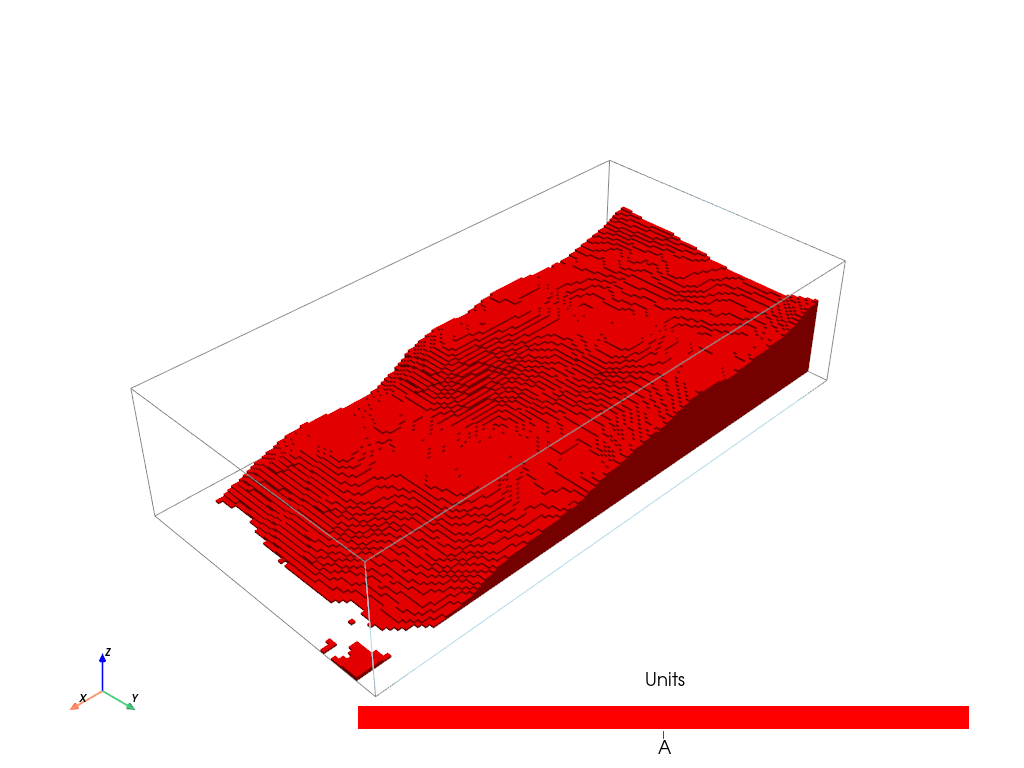

In [16]:
T1.plot_units(1, v_ex=5, excludedVal=[2, 3, 4, 1, 6, 7, 8])

### plotting unit B

Note that mean surface of sub-units (B1, B2, B3) are decorelated with mean surface of the mother unit (B). And for this reason, B3 and B2 does not appear to the right of the model (in x direction). If you want to correlate the sub units with mean unit, you have to carefully design your trends. In this case, it would be necessary to also give mean surfaces to B2 and B1

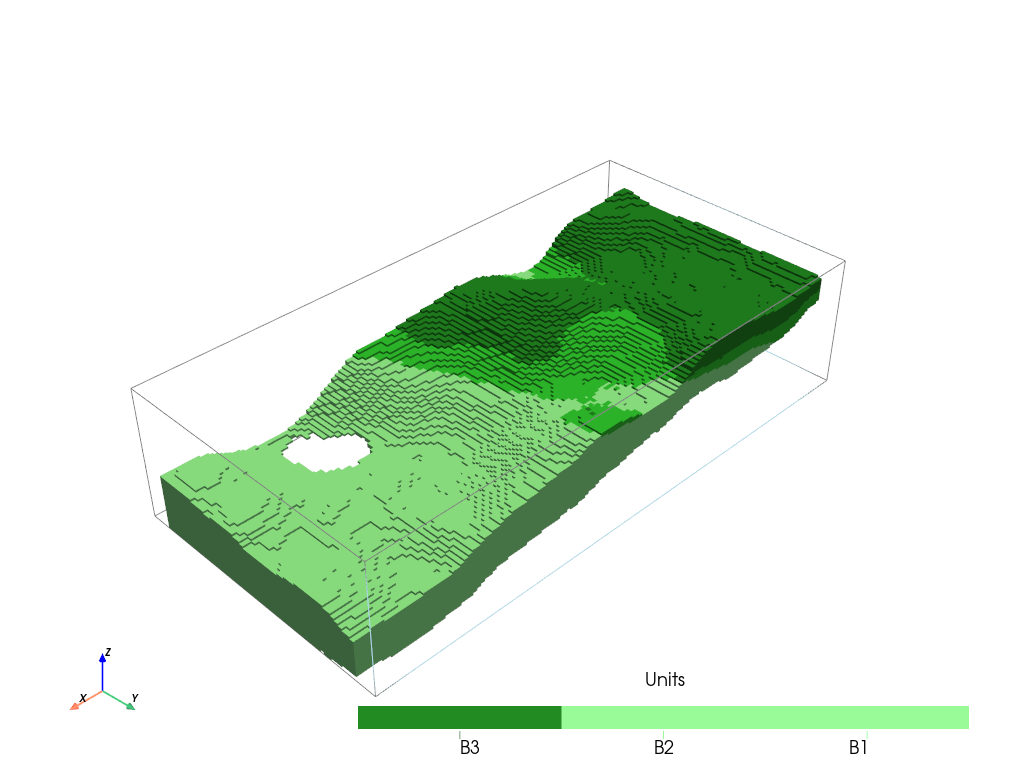

In [17]:
T1.plot_units(1, v_ex=5, excludedVal=[2, 3, 4, 1, 5])

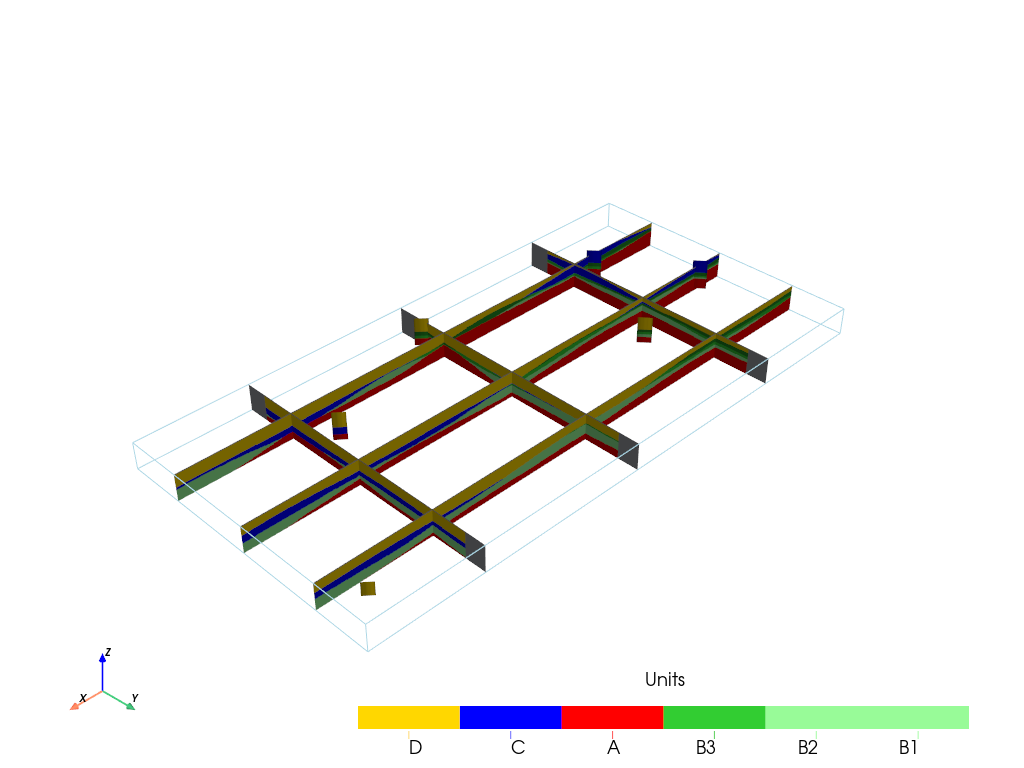

In [18]:
p = pv.Plotter()
v_ex = 1

T1.plot_units(1, v_ex=v_ex, plotter=p, slicex=(0.2, 0.5, 0.8), slicey=(0.2, 0.5, 0.8))
T1.plot_bhs(plotter=p, v_ex=v_ex)
p.show()

### Cross-sections

ArchPy integrates the possibility to make cross-section, interactively or not.
You can pass a list of point where to draw the cross-section. Boreholes are projected on the cross-section if they are at a distance less than ``dist_max``. You can choose which realization to plot with ``iu`` parameter. The width of the boreholes can be set with ``width`` parameter.

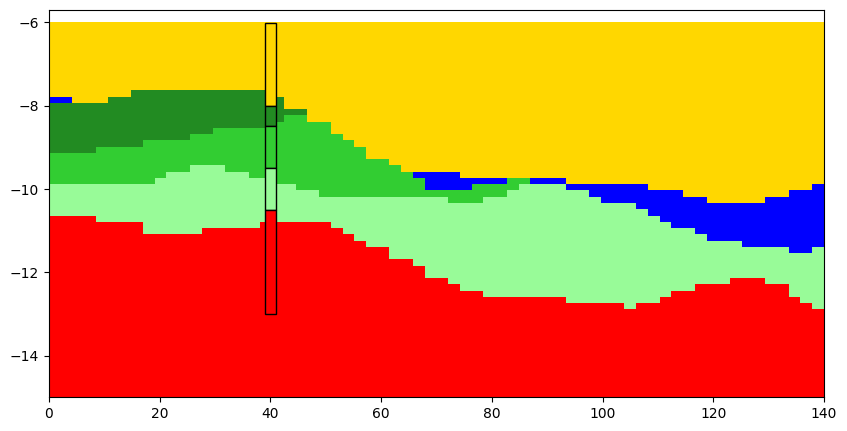

In [19]:
#cross section
#first a list of points must be defined
p2 = [10,70]
p3 = [150,70]
T1.plot_cross_section([p2,p3],iu=1, ratio_aspect=2, dist_max=15, width=2, h_level=0, typ="units")

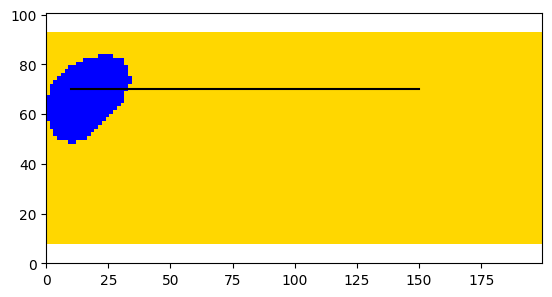

In [20]:
plt.imshow(T1.compute_geol_map(color=True), extent=T1.get_bounds())
plt.plot(*np.array([p2,p3]).T, c="k")